In [2]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.datasets import make_regression
import xgboost as xgb
import lightgbm as lgb
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

[-1.8893906827540121]


(-15.0, 15.0)

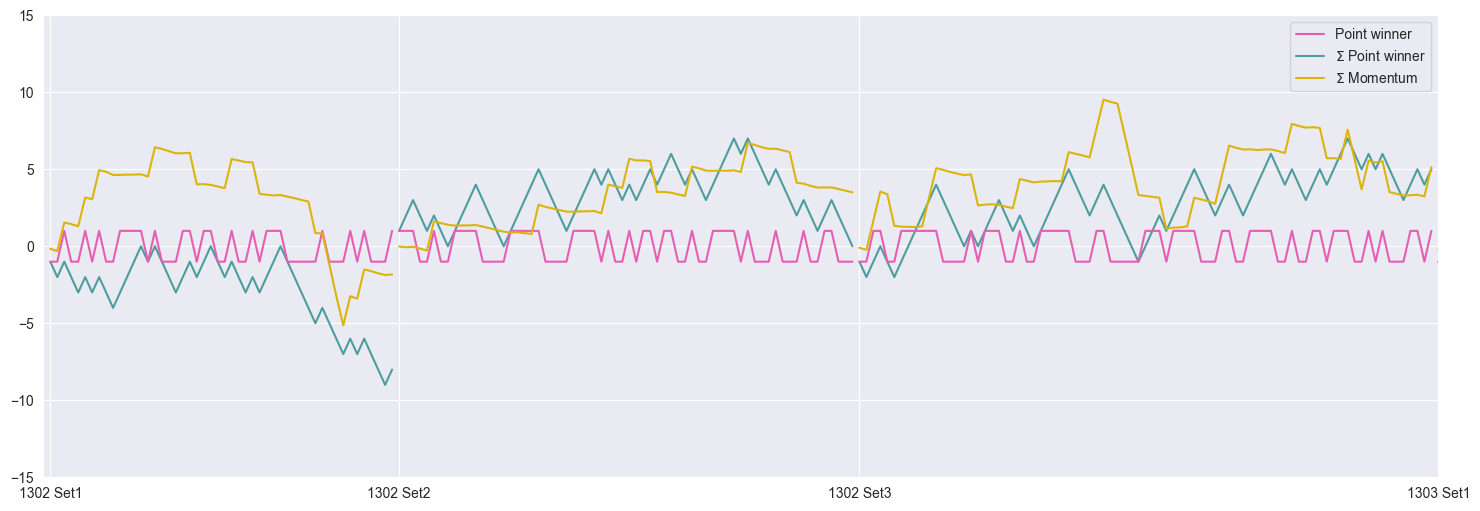

In [3]:


color = sns.diverging_palette(333, 195, s=74, l=60, n=7, sep=1, as_cmap=False)
color1 = sns.xkcd_rgb["gold"]

plt.figure(figsize=(18, 6))

data = pd.read_csv("../data/data.csv")
macro = pd.read_csv('../data/macro_data.csv')


macro = np.asarray(macro["Macro Predictions"])
server = np.asarray(data["server"].replace(2, 0))

server = server*2-1

pt_winner = data["point_victor"]
pt_winner = pd.DataFrame(pt_winner, columns=["point_victor"])
pt_winner = pt_winner.replace(2, 0)

pt_winner = np.asarray(pt_winner.T)[0]
pt_winner = pt_winner*2-1
pt_winner_integral = [pt_winner[0]]

macro = (macro-0.5)*5.5

performance = pt_winner - macro
performance_integral = [performance[0]]
print(performance_integral)

lastSet = 1
span = 0
xtick_index = [0]
xtick_content = [data["match_id"][0][-4:]+" Set"+str(data["set_no"][0])]
for i in range(0, len(pt_winner)-1):
    if lastSet != data["set_no"][i]:
        lastSet = data["set_no"][i]
        
        plt.plot(range(i-span, i+1), pt_winner_integral[i-span: i+1], color=color[6])
        plt.plot(range(i-span, i+1), pt_winner[i-span: i+1], color=color[0])
        plt.plot(range(i-span, i+1), performance_integral[i-span: i+1], color=color1)
        
        
        xtick_index.append(i+1)
        xtick_content.append(data["match_id"][i][-4:]+" Set"+str(data["set_no"][i]))
        
        pt_winner_integral.append(pt_winner[i+1])
        performance_integral.append(performance[i+1])
        
        span=0
    else:
        pt_winner_integral.append(pt_winner_integral[i]+pt_winner[i+1])
        performance_integral.append(performance_integral[i]+performance[i+1])
        span += 1

plt.xticks(xtick_index, xtick_content)
plt.plot(pt_winner[0], label="Point winner", color=color[0])
plt.plot(pt_winner[0], label="$\Sigma$ Point winner", color=color[6])
plt.plot(performance_integral[0], label="$\Sigma$ Momentum", color=color1)

plt.legend()
plt.xlim(299, 499)
plt.ylim(-15, 15)



(-5.0, 5.0)

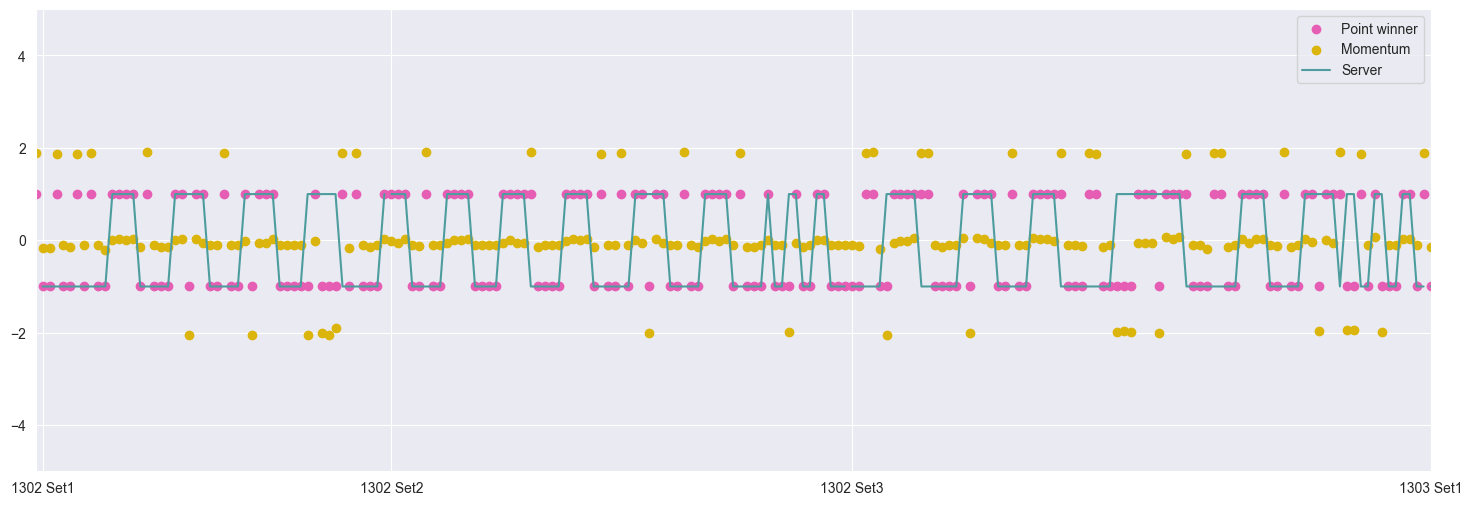

In [4]:
plt.figure(figsize=(18, 6))

lastSet = 1
span = 0
for i in range(0, len(pt_winner)-1):
    if lastSet != data["set_no"][i]:
        lastSet = data["set_no"][i]
        
        # plt.plot(range(i-span, i+1), pt_winner[i-span: i+1], color=color[0])
        # plt.plot(range(i-span, i+1), performance[i-span: i+1], color=color1)
        plt.plot(range(i-span, i+1), server[i-span: i+1], color=color[6])
        
        span=0
    else:
        span += 1

plt.xticks(xtick_index, xtick_content)
plt.scatter(range(0, len(pt_winner)), pt_winner, color=color[0], label="Point winner")
# plt.plot(pt_winner[0], label="Point winner", color=color[0])
plt.scatter(range(0, len(pt_winner)), performance, label="Momentum", color=color1)
plt.plot(server[0], label="Server", color=color[6])

plt.yticks()
plt.legend()
plt.xlim(299, 499)
plt.ylim(-5, 5)


(1000.0, 1500.0)

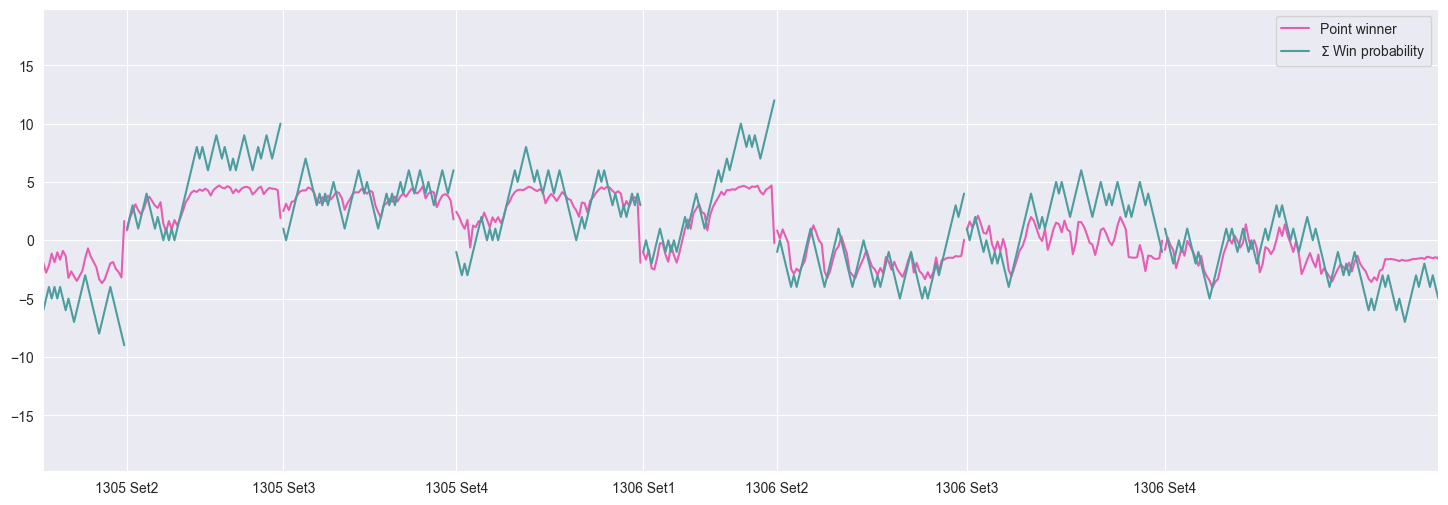

In [5]:
in_match = pd.read_csv("../data/inmatch_data.csv")

in_match = np.asarray(in_match["In Match Predictions"])

plt.figure(figsize=(18, 6))

inmatch_scaled = (0.5-in_match)*10
# plt.plot(pt_winner_integral)


plt.xlim(500, 700)

# plt.ylim(-5, 5)

lastSet = 1
span = 0
for i in range(0, len(pt_winner)-1):
    if lastSet != data["set_no"][i]:
        lastSet = data["set_no"][i]
        
        plt.plot(range(i-span, i+1), inmatch_scaled[i-span: i+1], color=color[0])
        # plt.plot(range(i-span, i+1), performance[i-span: i+1], color=color1)
        # plt.plot(range(i-span, i+1), server[i-span: i+1], color=color[6])
        plt.plot(range(i-span, i+1), pt_winner_integral[i-span: i+1], color=color[6])
        
        span=0
    else:
        span += 1

plt.xticks(xtick_index, xtick_content)
plt.plot(pt_winner_integral[0], color=color[0], label="Point winner")
plt.plot(inmatch_scaled[0], label="$\Sigma$ Win probability", color=color[6])
# plt.scatter(range(0, len(pt_winner)), inmatch_scaled, label="Momentum", color=color1)
# plt.plot(server[0], label="Server", color=color[6])

plt.yticks()
plt.legend()
plt.xlim(1000, 1500)
# plt.ylim(-10, 10)


(-0.5, 1.0)

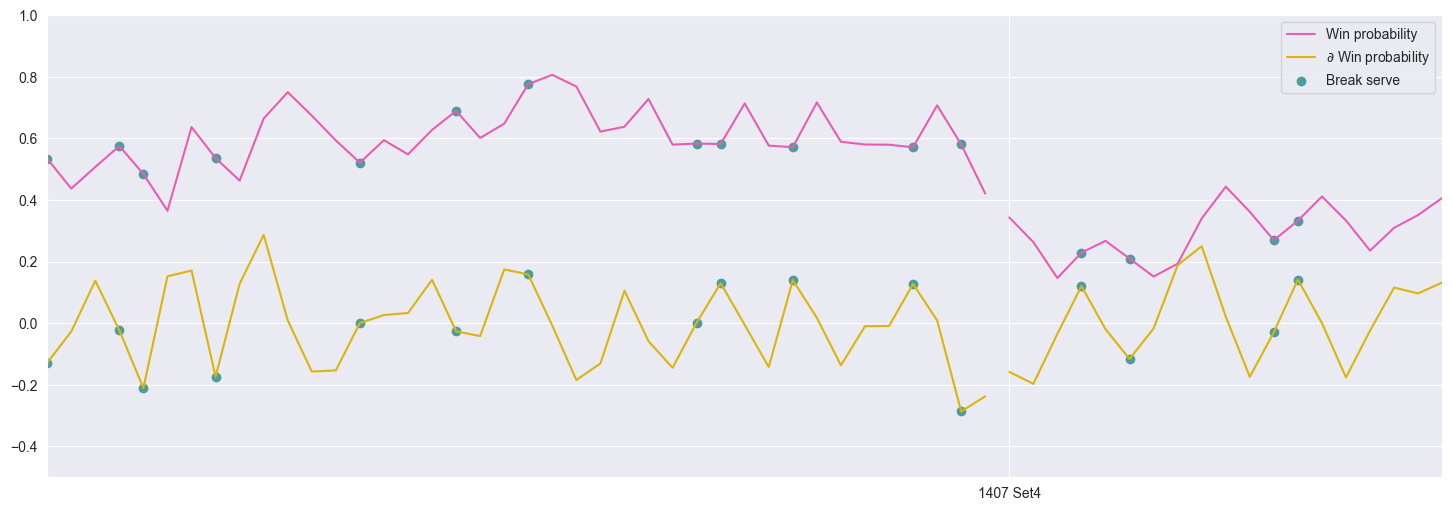

In [6]:


break_serve = []
break_serve_index = []
for i in range(len(server)):
    break_serve.append(server[i]!=pt_winner[i])
    if server[i]!=pt_winner[i]:
        break_serve_index.append(i)
        
in_match_diff = []
for i in range(len(in_match)-1):
    in_match_diff.append(in_match[i+1]-in_match[i-1])

# in_match_diff_smooth = np.convolve(in_match_diff, np.ones(10)/10, mode="same")


plt.figure(figsize=(18, 6))

lastSet = 1
span = 0
for i in range(0, len(pt_winner)-1):
    if lastSet != data["set_no"][i]:
        lastSet = data["set_no"][i]
        
        plt.plot(range(i-span, i+1), in_match[i-span: i+1], color=color[0])
        # plt.plot(range(i-span-1, i), np.asarray(performance_integral[i-span: i+1])*0.1, color=color[6])
        plt.plot(range(i-span, i+1), in_match_diff[i-span: i+1], color=color1)

        # plt.plot(range(i-span, i+1), pt_winner_integral[i-span: i+1], color=color[6])
        
        span=0
    else:
        span += 1

plt.xticks(xtick_index, xtick_content)
plt.plot(in_match[0], label="Win probability", color=color[0])
plt.plot(in_match[0], label="$\partial$ Win probability", color=color1)
# plt.plot(in_match[0], label="Momentum", color=color[6])
plt.scatter([i for i in break_serve_index], np.asarray(in_match)[np.asarray(break_serve_index)], label="Break serve", color=color[6])
plt.scatter([i for i in break_serve_index], np.asarray(in_match_diff)[np.asarray(break_serve_index)], color=color[6])

plt.yticks()
plt.legend()


plt.xlim(5242, 5300)
plt.ylim(-0.5, 1)

(-2.0, 2.0)

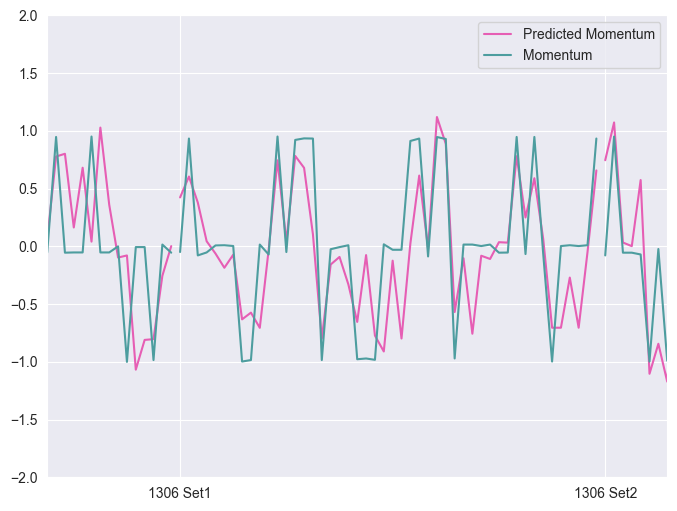

In [15]:
plt.figure(figsize=(8, 6))

micro = pd.read_csv("../data/micro_data.csv")
micro = np.array(micro["Micro Predictions"])

micro = (micro-0.5)*3

momentum = micro - macro


lastSet = 1
span = 0
for i in range(0, len(pt_winner)-1):
    if lastSet != data["set_no"][i]:
        lastSet = data["set_no"][i]
        
        plt.plot(range(i-span, i+1), momentum[i-span: i+1], color=color[0])
        # plt.plot(range(i-span-1, i), np.asarray(performance_integral[i-span: i+1])*0.1, color=color[6])
        plt.plot(range(i-span, i+1), (performance/2)[i-span: i+1], color=color[6])

        # plt.plot(range(i-span, i+1), pt_winner_integral[i-span: i+1], color=color[6])
        
        span=0
    else:
        span += 1

plt.xticks(xtick_index, xtick_content)
plt.plot(momentum[0], label="Predicted Momentum", color=color[0])
plt.plot((performance/2)[0], label="Momentum", color=color[6])

plt.legend()
plt.xlim(1200, 1270)
plt.ylim(-2, 2)

(-1.0, 1.0)

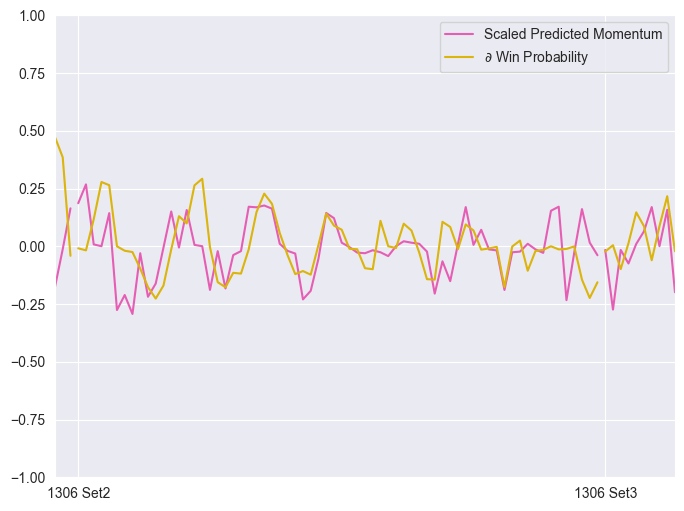

In [8]:
plt.figure(figsize=(8, 6))


lastSet = 1
span = 0

momentum_scaled = momentum*0.25
in_match_scaled = in_match - 0.5

for i in range(0, len(pt_winner)-1):
    if lastSet != data["set_no"][i]:
        lastSet = data["set_no"][i]
        
        plt.plot(range(i-span, i+1), momentum_scaled[i-span: i+1], color=color[0])
        # plt.plot(range(i-span-1, i), np.asarray(performance_integral[i-span: i+1])*0.1, color=color[6])
        plt.plot(range(i-span, i+1), np.asarray(in_match_diff)[i-span+1: i+2], color=color1)

        # plt.plot(range(i-span, i+1), pt_winner_integral[i-span: i+1], color=color[6])
        
        span=0
    else:
        span += 1

plt.xticks(xtick_index, xtick_content)
plt.plot(momentum_scaled[0], label="Scaled Predicted Momentum", color=color[0])
plt.plot((np.asarray(in_match_diff))[0], label="$\partial$ Win Probability", color=color1)

plt.legend()
plt.xlim(1260, 1340)
plt.ylim(-1, 1)

(-2.0, 2.0)

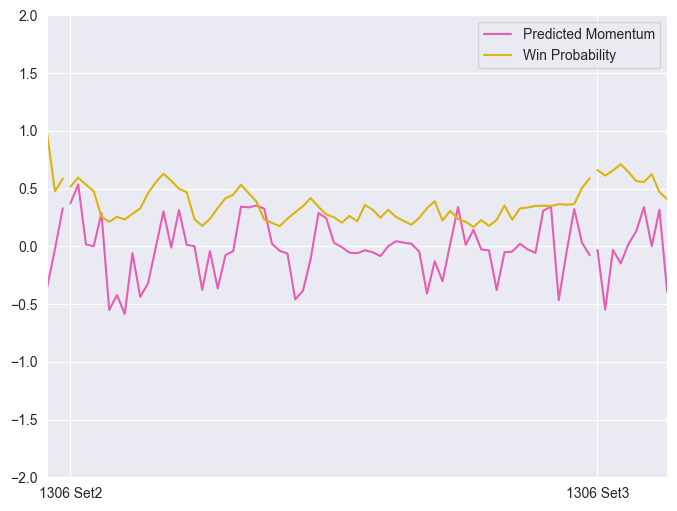

In [9]:
plt.figure(figsize=(8, 6))


lastSet = 1
span = 0

momentum_scaled = momentum*0.5
in_match_scaled = in_match - 0.5

for i in range(0, len(pt_winner)-1):
    if lastSet != data["set_no"][i]:
        lastSet = data["set_no"][i]
        
        plt.plot(range(i-span, i+1), momentum_scaled[i-span: i+1], color=color[0])
        # plt.plot(range(i-span-1, i), np.asarray(performance_integral[i-span: i+1])*0.1, color=color[6])
        plt.plot(range(i-span, i+1), 1-np.asarray(in_match)[i-span+1: i+2], color=color1)

        # plt.plot(range(i-span, i+1), pt_winner_integral[i-span: i+1], color=color[6])
        
        span=0
    else:
        span += 1

plt.xticks(xtick_index, xtick_content)
plt.plot(momentum_scaled[0], label="Predicted Momentum", color=color[0])
plt.plot(1-np.asarray(in_match)[0], label="Win Probability", color=color1)

plt.legend()
plt.xlim(1260, 1340)
plt.ylim(-2, 2)


(-2.0, 2.0)

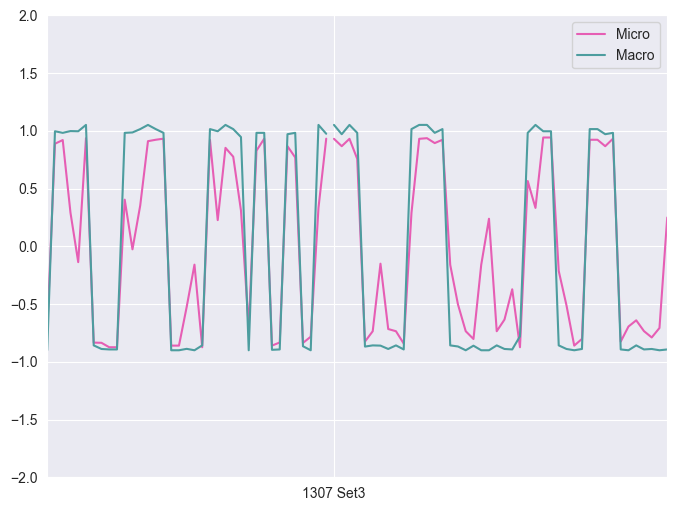

In [10]:
plt.figure(figsize=(8, 6))


lastSet = 1
span = 0
for i in range(0, len(pt_winner)-1):
    if lastSet != data["set_no"][i]:
        lastSet = data["set_no"][i]
        plt.plot(range(i-span, i+1), micro[i-span: i+1], color=color[0])
        # plt.plot(range(i-span-1, i), np.asarray(performance_integral[i-span: i+1])*0.1, color=color[6])
        plt.plot(range(i-span, i+1), macro[i-span: i+1], color=color[6])
        
        # plt.fill_between(range(i-span, i+1), micro[i-span: i+1], macro[i-span: i+1], where=macro[i-span: i+1]>micro[i-span: i+1], color="gold")
        # plt.fill_between(range(i-span, i+1), micro[i-span: i+1], macro[i-span: i+1], where=macro[i-span: i+1]<micro[i-span: i+1], color="darkgreen")
        # plt.plot(range(i-span, i+1), pt_winner_integral[i-span: i+1], color=color[6])
        
        span=0
    else:
        span += 1
        
plt.xticks(xtick_index, xtick_content)
plt.plot(micro[0], label="Micro", color=color[0])
plt.plot(macro[0], label="Macro", color=color[6])

plt.legend()
plt.xlim(1660, 1740)
plt.ylim(-2, 2)

(-15.0, 15.0)

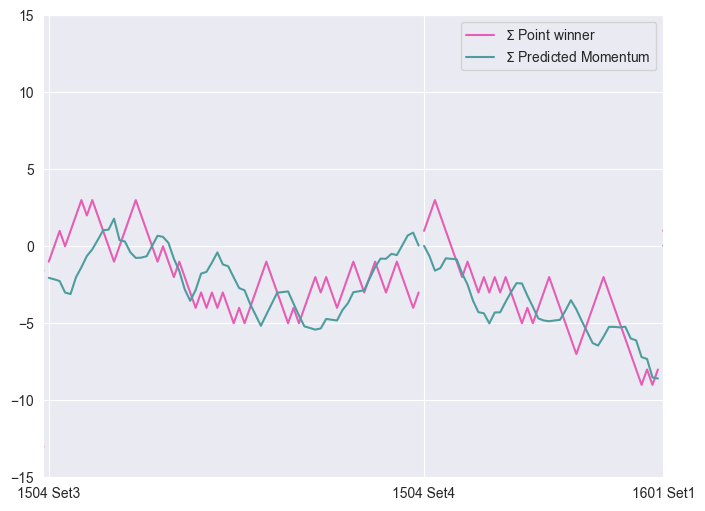

In [48]:
plt.figure(figsize=(8, 6))

momentum_integral = [momentum[0]]

lastSet = 1
span = 0
xtick_index = [0]
xtick_content = [data["match_id"][0][-4:]+" Set"+str(data["set_no"][0])]
for i in range(0, len(pt_winner)-1):
    if lastSet != data["set_no"][i]:
        lastSet = data["set_no"][i]
        
        plt.plot(range(i-span, i+1), pt_winner_integral[i-span: i+1], color=color[0])
        # plt.plot(range(i-span, i+1), pt_winner[i-span: i+1], color=color[0])
        plt.plot(range(i-span, i+1), momentum_integral[i-span: i+1], color=color[6])

        
        xtick_index.append(i+1)
        xtick_content.append(data["match_id"][i][-4:]+" Set"+str(data["set_no"][i]))
        
        pt_winner_integral.append(pt_winner[i+1])
        momentum_integral.append(performance[i+1])
        
        span=0
    else:
        pt_winner_integral.append(pt_winner_integral[i]+pt_winner[i+1])
        momentum_integral.append(momentum_integral[i]+momentum[i+1])
        span += 1

plt.xticks(xtick_index, xtick_content)
# plt.plot(pt_winner[0], label="Point winner", color=color[0])
plt.plot(pt_winner[0], label="$\Sigma$ Point winner", color=color[0])
plt.plot(momentum_integral[0], label="$\Sigma$ Predicted Momentum", color=color[6])

plt.legend()
plt.xlim(6422, 6536)
plt.ylim(-15, 15)
# 5400, 5500
